# Neural Network
Understanding the selectivity of kmers in phages, against bacteria targets\
Each phage has a confirmed binding to a bacteria. The kmers of the phage can therefore be denoted with True/False for binding to a bacteria.\
Using MinHash sketches, the kmers are compressed, while its uniqueness is still preserved.\
With MinHashed kmers however, we cant "go back" and extract which kmers were most important.

## Prepping data 


In [1]:
import sourmash, os
from tqdm import tqdm
import pandas as pd
import numpy as np
from manipulations import hostrange_df_to_dict, binarize_host_range
from io_operations import load_minhash_sketches

K = 12 #kmer size in nucleotides
n = 50 #minhash sketch size
raw_data_path = "../raw_data/"
data_prod_path = "../data_prod/"
#SKETCH_DIR = data_prod_path + f"phage_minhash_{K}/"

### Phage kmer data - MinHashed sketches

Prepping hostrange data

In [2]:
from io_operations import call_hostrange_df
bact_lookup, host_range_df = call_hostrange_df(raw_data_path + "phagehost_KU/Hostrange_data_all_crisp_iso.xlsx")
print(bact_lookup)
display(host_range_df)

{'J14_21_reoriented': 'Acinetobacter calcoaceticus', 'J53_21_reoriented': 'Acinetobacter calcoaceticus', 'J105_22_reoriented': 'Chishuiella', 'J46_21_reoriented': 'Chryseobacterium', 'J50_21_reoriented': 'Chryseobacterium', 'J2264_1_22_KMC_reoriented': 'Chryseobacterium', 'J2264_3_22_KMC_reoriented': 'Chryseobacterium', 'J63_22_reoriented': 'Chryseobacterium', 'J64_22_reoriented': 'Chryseobacterium', 'J1_21_reoriented': 'Lelliottia', 'J91_22_reoriented': 'Lelliottia', 'J51_21_reoriented': 'Morganella morganii', 'J57_21_reoriented': 'Morganella morganii', 'J10_21_reoriented': 'Pectobacterium atrosepticum', 'J11_21_reoriented': 'Pectobacterium atrosepticum', 'J126_23_reoriented': 'Pectobacterium atrosepticum', 'J12_21_reoriented': 'Pectobacterium atrosepticum', 'J16_21_reoriented': 'Pectobacterium atrosepticum', 'J22_21_reoriented': 'Pectobacterium atrosepticum', 'J28_21_reoriented': 'Pectobacterium atrosepticum', 'J33_21_reoriented': 'Pectobacterium atrosepticum', 'J38_21_reoriented': '

,phage,Ymer,Taid,Poppous,Koroua,Abuela,Amona,Sabo,Mimer,Crus,...,Vims,Echoes,Galvinrad,Uther,Rip,Rup,Slaad,Pantea,Rap,Zann
0,J14_21_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,J53_21_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,J105_22_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,J46_21_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,J50_21_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,J109_23_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,J101_22_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,J15_21_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,800000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,J4_21_reoriented,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Isolation host,Isolation host,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert the host range data into a dictionary
host_range_data = hostrange_df_to_dict(host_range_df)
host_range_data = binarize_host_range(host_range_data, TS=True)

host_range_data["J10_21_reoriented"]


--- Normalized Dictionary ---

for bact: J14_21_reoriented
for phage: Ymer, nan
for phage: Taid, nan
for phage: Poppous, nan
for phage: Koroua, nan
for phage: Abuela, nan
for phage: Amona, nan
for phage: Sabo, nan
for phage: Mimer, nan
for phage: Crus, nan
for phage: Gander, nan
for phage: Guf, nan
for phage: Hoejben, nan
for phage: Magnum, nan
for phage: Vims, nan
for phage: Echoes, nan
for phage: Galvinrad, nan
for phage: Uther, nan
for phage: Rip, nan
for phage: Rup, nan
for phage: Slaad, nan
for phage: Pantea, nan
for phage: Rap, nan
for phage: Zann, nan

for bact: J53_21_reoriented
for phage: Ymer, nan
for phage: Taid, nan
for phage: Poppous, nan
for phage: Koroua, nan
for phage: Abuela, nan
for phage: Amona, nan
for phage: Sabo, nan
for phage: Mimer, nan
for phage: Crus, nan
for phage: Gander, nan
for phage: Guf, nan
for phage: Hoejben, nan
for phage: Magnum, nan
for phage: Vims, nan
for phage: Echoes, nan
for phage: Galvinrad, nan
for phage: Uther, nan
for phage: Rip, nan
for p

{'Ymer': np.float64(0.0),
 'Taid': np.float64(0.0),
 'Poppous': np.float64(0.0),
 'Koroua': np.float64(0.0),
 'Abuela': np.float64(0.0),
 'Amona': np.float64(0.0),
 'Sabo': np.float64(0.0),
 'Mimer': np.float64(0.0),
 'Crus': np.float64(0.0),
 'Gander': np.float64(0.0),
 'Guf': np.float64(0.0),
 'Hoejben': np.float64(0.0),
 'Magnum': np.float64(0.7546390907120161),
 'Vims': np.float64(0.0),
 'Echoes': np.float64(0.0),
 'Galvinrad': np.float64(0.0),
 'Uther': np.float64(0.0),
 'Rip': np.float64(0.0),
 'Rup': np.float64(0.0),
 'Slaad': np.float64(0.0),
 'Pantea': np.float64(0.0),
 'Rap': np.float64(0.0),
 'Zann': np.float64(0.0)}

Loading MinHash sketches

In [4]:
phage_minhash_data = load_minhash_sketches(data_prod_path+f"SM_sketches/PhageMinhash_n{n}_k{K}_rev/", 
                                           TS=True, output_as_np=True)

bact_minhash_data = load_minhash_sketches(data_prod_path+f"SM_sketches/BactMinhash_n{n}_k{K}_rev/", 
                                          TS=True, output_as_np=True)

filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage6_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage12_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage15_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage1_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage9_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage8_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage0_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage14_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage13_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage7_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage19_minhash_37.sig
filepath: ../data_prod/SM_sketches/PhageMinhash_n50_k12_rev/phage5_minhash_37.sig
filepath: .

### Constructing minhash presence matrix
If we list all possible minhashes as columns and all phage and bacteria as rows, we can construct a 0 or 1 presence matrix for each value on the matrix. \
Each phage row and bacteria row can be combined pairwise with hostrange values, as input for the network. This ensures that the input nodes will have the same kmers, since the index of each column will always represent the same hash (/kmer)

In [5]:
from manipulations import construct_presence_matrix

#
phage_presence_matrix_df, bact_presence_matrix_df = construct_presence_matrix(phage_minhash_data, bact_minhash_data, TS = True)

# Verify that both presence matrices have the same features/columns
if list(phage_presence_matrix_df.columns) != list(phage_presence_matrix_df.columns):
    raise ValueError("Phage and Bacteria presence matrices have different features/columns!")
else:
    print("Phage and Bacteria presence matrices have identical features/columns.")

display(phage_presence_matrix_df.head())
display(bact_presence_matrix_df.head())

Phage binary presence matrix shape (rows, cols): (23, 2036)
Bact binary presence matrix shape (rows, cols): (110, 2036)
Phage and Bacteria presence matrices have identical features/columns.


,43562906906,652945146928,2603753039444,5145884020526,5403791273531,5702797831338,6332607832753,8278172526497,9181709096613,9234700310682,...,2424295331507110718,2515798519573818332,2545666962409050286,2619546532462317130,2642843320644479424,2773825440771053090,2837813644615357782,2849169299176147043,2884008601854621505,2971496429922108962
Pectobacterium_phage_Crus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Serratia_phage_Echoes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pectobacterium_phage_Mimer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Lelliottia_phage_Rap,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Pectobacterium_phage_Hoejben,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,43562906906,652945146928,2603753039444,5145884020526,5403791273531,5702797831338,6332607832753,8278172526497,9181709096613,9234700310682,...,2424295331507110718,2515798519573818332,2545666962409050286,2619546532462317130,2642843320644479424,2773825440771053090,2837813644615357782,2849169299176147043,2884008601854621505,2971496429922108962
J6_21_reoriented,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
J103_22_reoriented,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
J82_22_reoriented,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
J61_21_reoriented,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
J3_21_reoriented,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Obtaining generator objects for train, val and test
The key point is that each generator only "sees" the subset of interactions defined by its own list of keys, but it still has access to the complete, underlying minhash dictionaries to fetch the required vectors.

In [6]:
from sklearn.model_selection import train_test_split

# All your (phage, bacteria) tuples
all_keys = []
for p_name, bact_scores in host_range_data.items():
    for b_name in bact_scores:
        all_keys.append((p_name, b_name))

# 60% Train, 20% Temp (Val + Test)
train_keys, temp_keys = train_test_split(all_keys, test_size=0.4, random_state=42)

# Split Temp into 20% Validation, 20% Test (0.5 * 0.4 = 0.2)
val_keys, test_keys = train_test_split(temp_keys, test_size=0.5, random_state=42)

print(f"Train samples: {len(train_keys)}")
print(f"Validation samples: {len(val_keys)}")
print(f"Test samples: {len(test_keys)}")

Train samples: 1518
Validation samples: 506
Test samples: 506


In [7]:
from manipulations import get_max_dim

#Calculate max size of minhash vectors (used for padding in generator)
max_phage_dim = get_max_dim(phage_minhash_data)
max_bact_dim = get_max_dim(bact_minhash_data)
global_input_dim = max_phage_dim + max_bact_dim

In [8]:
from data_generators import MinhashPairGenerator
# Pass the original, complete minhash and score dictionaries to ALL generators
# but restrict them using only their specific key list (passed implicitly/initially)

train_generator = MinhashPairGenerator(
    list_IDs=train_keys,
    phage_minhashes=phage_minhash_data,
    max_phage_dim = max_phage_dim,
    bacteria_minhashes=bact_minhash_data, 
    max_bact_dim = max_bact_dim,
    interaction_scores=host_range_data, 
    batch_size=32, 
    shuffle=True # Always shuffle training data
)

val_generator = MinhashPairGenerator(
    list_IDs=val_keys, 
    phage_minhashes=phage_minhash_data, 
    max_phage_dim = max_phage_dim,
    bacteria_minhashes=host_range_data,
    max_bact_dim = max_bact_dim, 
    interaction_scores=host_range_data, 
    batch_size=32, 
    shuffle=False # Typically don't shuffle validation/test
)

test_generator = MinhashPairGenerator(
    list_IDs=test_keys, 
    phage_minhashes=phage_minhash_data, 
    max_phage_dim = max_phage_dim,
    bacteria_minhashes=bact_minhash_data, 
    max_bact_dim = max_bact_dim,
    interaction_scores=host_range_data, 
    batch_size=32, 
    shuffle=False # Typically don't shuffle validation/test
)

In [9]:
# Assuming you want the first batch of data
X_batch, y_batch = train_generator[0] 
print(f"Features batch shape: {X_batch.shape}")
print(f"Labels batch shape: {y_batch.shape}")

Features batch shape: (32, 100)
Labels batch shape: (32, 1)


In [10]:
print(X_batch[0])

[3.98469802e+13 4.28448008e+14 6.01855907e+14 1.17431299e+15
 1.84505048e+15 2.28158847e+15 2.40033739e+15 2.45269369e+15
 2.46662309e+15 2.76098240e+15 2.96160071e+15 3.15374522e+15
 3.17603572e+15 3.17636246e+15 3.32354255e+15 3.80820347e+15
 4.04146361e+15 4.08453794e+15 4.32870846e+15 4.92929433e+15
 5.15944609e+15 5.16221360e+15 5.18834493e+15 5.30132037e+15
 5.53138824e+15 5.58812361e+15 5.61308480e+15 5.86698743e+15
 6.27250203e+15 6.36533462e+15 6.44908459e+15 6.97921894e+15
 7.44628211e+15 8.10068809e+15 8.11665905e+15 8.30257051e+15
 8.38184163e+15 8.53715846e+15 8.58212132e+15 8.58629041e+15
 8.75348343e+15 9.09875364e+15 9.12778022e+15 9.25437269e+15
 9.65271639e+15 9.65775124e+15 9.75692741e+15 9.92129222e+15
 1.08562698e+16 1.09009457e+16 6.52945147e+11 2.60375304e+12
 5.40379127e+12 6.33260783e+12 9.18170910e+12 9.23470031e+12
 1.18109238e+13 1.36956575e+13 1.77886859e+13 2.17833176e+13
 2.32990174e+13 3.57703734e+13 3.98469802e+13 4.34119763e+13
 4.45260776e+13 4.504692

## Running NN

Inits

In [11]:
### Packages -----------------------------
import random, shutil, os, sys
import numpy as np
import pandas as pd
import math
import pickle
import sys
import matplotlib.pyplot as plt

### Paths --------------------------------
raw_data_path = "../raw_data/"
data_prod_path = "../data_prod/"
NN_files_path = data_prod_path + "NN_files/"
if not os.path.exists(NN_files_path):
    os.makedirs(NN_files_path)
else:
    shutil.rmtree(NN_files_path)
    os.makedirs(NN_files_path)

### Custom variables ---------------------
K = 12 #kmer size; equal to 6 aa.
selected_bact_species = "Pectobacterium brasiliense" 
full_path = data_prod_path+f"phage_minhash_{K}_combined/{selected_bact_species.replace(' ', '_')}_combined.txt"
if not os.path.exists(full_path):
    raise FileNotFoundError("Combined minhash txt file for the selected bacteria species not found. Please run the data preparation steps first.")

### Splitting data
each folder in phage_minhash_K_txt is a bacteria name, specifying whether the sketches of each underlying phage txt file, can infect it.

In [12]:
def separate_test(path, train_val_ratio=0.9, test_ratio=0.1, TS = False) -> tuple:
    """
    Separate the input file into training/validation and test sets based on specified ratios.
    Write the separated data to respective train_val and test files.
    Returns the paths to the train_val and test files.
    """
    if abs(train_val_ratio + test_ratio - 1.0) > 1e-6:
        raise ValueError("Train, validation, and test ratios must sum to 1.")

    if type(path) == list:
        lines = []
        for input_file in path:
            if TS: print(f"Separating data from {input_file} into train/val and test sets...")
            try: 
                with open(input_file, 'r') as f:
                    lines.extend(f.readlines())
            except FileNotFoundError as e:
                print("File not found: ", e)
    else:
        if TS: print(f"Separating data from {path} into train/val and test sets...")
        with open(path, 'r') as f:
            lines = f.readlines()

    random.shuffle(lines)

    total_lines = len(lines)
    train_val_end = int(total_lines * train_val_ratio)

    train_data = lines[:train_val_end]
    test_data = lines[train_val_end:]
    
    if TS: 
        print(f"Total lines: {total_lines}, Train/Val lines: {len(train_data)}, Test lines: {len(test_data)}")
        print(f"Ratios - Train/Val: {len(train_data)/total_lines:.2f}, Test: {len(test_data)/total_lines:.2f}", end="\n\n")

    # Write the separated data to respective files to save memory
    train_val_path = NN_files_path + f"{selected_bact_species.replace(' ', '_')}_train_val.txt"
    with open(NN_files_path + f"{selected_bact_species.replace(' ', '_')}_train_val.txt", 'w') as f:
        f.writelines(train_data)
    
    test_path = NN_files_path + f"{selected_bact_species.replace(' ', '_')}_test.txt"
    with open(NN_files_path + f"{selected_bact_species.replace(' ', '_')}_test.txt", 'w') as f:
        f.writelines(test_data)
    
    return train_val_path, test_path

def lines_to_df(lines):
    rows = [l.strip().split('\t') for l in lines if l.strip()]
    df = pd.DataFrame(rows, columns=['kmer_hash', 'label'])
    # set proper dtypes
    df['kmer_hash'] = pd.to_numeric(df['kmer_hash'], errors='coerce').astype(np.uint64)
    df['label'] = pd.to_numeric(df['label'], errors='coerce').astype(int)
    return df

def k_fold_split(train_val_file, k=5, seed=42):
    """
    Perform k-fold cross-validation split on the input file.
    Returns a list of (train_data, val_data) tuples for each fold.
    Does not return test data.
    """    
    # Read all the shuffled train val data
    with open(train_val_file, 'r') as f:
        lines = f.readlines()

    # Compute fold sizes
    total = len(lines)
    fold_size = total // k
    folds = [lines[i*fold_size:(i+1)*fold_size] for i in range(k)]

    # Handle remainder lines (if not evenly divisible)
    remainder = lines[k*fold_size:]
    for i, line in enumerate(remainder):
        folds[i % k].append(line)

    # Generate (train, val) pairs
    all_folds = []
    for i in range(k):
        val_lines = folds[i]
        train_lines = [line for j, f in enumerate(folds) if j != i for line in f]

        train_df = lines_to_df(train_lines)
        val_df = lines_to_df(val_lines)
        all_folds.append((train_df, val_df))
    
    return all_folds

def train_network(net, x_train, y_train, learning_rate):
    """
    Trains the network for a single epoch, running the forward and backward pass, and compute and return the loss.
    """
    # Forward pass
    z1, a1, z2, a2  = net.forward(x_train)
    # backward pass
    backward(net, x_train, y_train, z1, a1, z2, a2, learning_rate)
    loss = np.mean((a2 - y_train) ** 2)
    return loss
        
def eval_network(net, x_valid, y_valid):
    """
    Evaluates the network ; Note that we do not update weights (no backward pass)
    """
    z1, a1, z2, a2 = net.forward(x_valid)
    loss = np.mean((a2-y_valid)**2)
    return loss

# Model saving and loading functions
def save_ffnn_model(filepath, model):
    if not filepath.endswith('.pkl'):
        filepath = filepath+'.pkl'
    with open(filepath, 'wb') as f:
        dict_to_save = {'input_size': model.W1.shape[0], 'hidden_size':model.W1.shape[1], 'output_size':model.W2.shape[1],
                        'W1': model.W1, 'b1':model.b1, 'W2':model.W2, 'b2':model.b2}
        pickle.dump(dict_to_save, f)
        print(f'Saved FFNN model at {filepath}')


def load_ffnn_model(filepath, model=None):

    with open(filepath, 'rb') as f:
        loaded_dict = pickle.load(f)
    if model is None:
            model = SimpleFFNN(loaded_dict['input_size'], loaded_dict['hidden_size'], loaded_dict['output_size'])
    assert (model.W1.shape[0]==loaded_dict['input_size'] and model.W1.shape[1]==loaded_dict['hidden_size'] and model.W2.shape[1]==loaded_dict['output_size']), \
        f"Model and loaded weights size mismatch!. Provided model has weight of dimensions {model.W1.shape, model.W2.shape} ; Loaded weights have shape {loaded_dict['W1'].shape, loaded_dict['W2'].shape}"

    model.W1 = loaded_dict['W1']
    model.b1 = loaded_dict['b1']
    model.W2 = loaded_dict['W2']
    model.b2 = loaded_dict['b2']
    print(f"Model loaded successfully from {filepath}\nwith weights [ W1, W2 ] dimensions : {model.W1.shape, model.W2.shape}")
    return model

def plot_losses(train_losses, valid_losses, n_epochs, title=None):
    # Plotting the losses 
    fig,ax = plt.subplots(1,1, figsize=(9,5))
    ax.plot(range(n_epochs), train_losses, label='Train loss', c='b')
    ax.plot(range(n_epochs), valid_losses, label='Valid loss', c='m')
    ax.legend()
    if title is not None:
        fig.suptitle(title)
    fig.show()

In [13]:
train_val_path, test_path = separate_test(full_path, train_val_ratio=0.9, test_ratio=0.1, TS=True)
print(f"Training/Validation data saved to: {train_val_path}")
print(f"Test data saved to: {test_path}")

#Retun list of paths were files start with Pecto in data_prod_path+f"phage_minhash_{K}_combined/
# combined_path = data_prod_path+f"phage_minhash_{K}_combined/"
# pecto_files = [combined_path+path for path in os.listdir(combined_path) if path.startswith("Pecto")]
# print(pecto_files)
# train_val_path, test_path = separate_test(pecto_files, train_val_ratio=0.9, test_ratio=0.1, TS=True)
# print(f"Training/Validation data saved to: {train_val_path}")
# print(f"Test data saved to: {test_path}")

Separating data from ../data_prod/phage_minhash_12_combined/Pectobacterium_brasiliense_combined.txt into train/val and test sets...
Total lines: 1132638, Train/Val lines: 1019374, Test lines: 113264
Ratios - Train/Val: 0.90, Test: 0.10

Training/Validation data saved to: ../data_prod/NN_files/Pectobacterium_brasiliense_train_val.txt
Test data saved to: ../data_prod/NN_files/Pectobacterium_brasiliense_test.txt


In [14]:
#Purely to define split, no writing
k_fold_data = k_fold_split(train_val_path, k=5, seed=42)
for fold_idx, (train_data, val_data) in enumerate(k_fold_data):
    print(f"Fold {fold_idx+1}: Train data length: {len(train_data)}, Val data length: {len(val_data)}")

Fold 1: Train data length: 815499, Val data length: 203875
Fold 2: Train data length: 815499, Val data length: 203875
Fold 3: Train data length: 815499, Val data length: 203875
Fold 4: Train data length: 815499, Val data length: 203875
Fold 5: Train data length: 815500, Val data length: 203874


### Defining NN class

In [15]:
# Weights initialization function.
def xavier_initialization_normal(input_dim, output_dim):
    shape = (input_dim, output_dim)
    stddev = np.sqrt(2 / (input_dim + output_dim))
    return np.random.normal(0, stddev, size=shape) * 0.1

def random_initialization_normal(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim) * 0.1

In [16]:
class SimpleFFNN:
    def __init__(self, input_size, hidden_size, output_size, initialization_function=xavier_initialization_normal):
        # Initialize weights and biases with small random values
        # initialization_function(input_dim, output_dim) -> np.array of shape (input_dim, output_dim)
        self.W1 = initialization_function(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = initialization_function(hidden_size, output_size)
        self.b2 = np.zeros(output_size)
        print(f'Input -> Hidden Layer Weight Matrix Shape: {self.W1.shape}',
              f'First Layer Bias Weights Vector Shape: {self.b1.shape}',
              f'Hidden -> Output layer Weight Matrix Shape: {self.W2.shape}',
              f'Second Layer Bias Weights Vector Shape: {self.b2.shape}', sep="\n")
        
    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x): 
        """
        The normal version of sigmoid 1 / (1 + np.exp(-x)) is NOT numerically stable
        Here we split the case into two for positive and negative inputs
        because np.exp(-x) for something negative will quickly overflow if x is a large negative number
        """
        # This is equivalent to : 
        # if x>=0, then compute (1/(1+np.exp(-x)))
        # if x<0: compute (np.exp(x)/(1+np.exp(x))))
        return np.where(x >= 0, 1 / (1 + np.exp(-x)), 
                        np.exp(x) / (1 + np.exp(x)))

    def forward(self, x):
        """
        x:
        zi denotes the output of a hidden layer i
        ai denotes the output of an activation function (non-linearity) at layer i
        (activations are relu, sigmoid, tanh, etc.)
        Use self.function to call a method. for example: self.relu(XX)
        """

        # First layer : Use a relu here for the activation 
        z1 = np.dot(x, self.W1) + self.b1 #XX
        a1 = self.relu(z1) #XX
        
        # Output layer : Use a sigmoid here for the activation
        z2 = np.dot(a1, self.W2) + self.b2 #XX
        a2 = self.sigmoid(z2) #XX
        
        # Return all the intermediate outputs as well because we need them for backpropagation (see slides)
        return z1, a1, z2, a2

def relu_derivative(a):
    return np.where(a > 0, 1, 0)

def sigmoid_derivative(a):
    """
    For this derivative, it is not necessary to find a numerically stable version.
    Just take the base formula and derive it.    
    """
    return np.array(a*(1 - a))


def backward(net, x, y, z1, a1, z2, a2, learning_rate=0.01):
    """
    Function to backpropagate the gradients from the output to update the weights.
    Apply the chain rule and slowly work out the chain derivatives from the output back to the input
    Reminder that np.dot(array_1, array_2) and array.T exists to transpose an array for matrix multiplication
    """
    # This assumes that we are computing a MSE as the loss function.
    # Look at your slides to compute the gradient backpropagation for a mean-squared error using the chain rule.

    # Output layer error ; We used a sigmoid in this layer
    dE_dO = a2 - y
    dO_do = sigmoid_derivative(a2)
    dE_do = dE_dO * dO_do

    #print("dE_do", dE_do.shape)
    ### (REMEMBER for np.dot(A,B) columns of A MUST equal rows in B) ###
    
    # Backpropagate to hidden layer 
    #print("a1", a1.shape)
    dE_dW2 = np.dot(dE_do.T, a1)
    dE_db2 = np.sum(dE_do, axis=0, keepdims=True)
    dE_db2 = dE_db2.squeeze() # Squeeze is needed here to make the dimensions fit
    #print("dE_dW2", dE_dW2.shape)
    #print("dE_db2", dE_dW2.shape)

    # Hidden layer error ; We used a ReLU in this layer!
    # (O − t)⋅ g'(o)⋅wj
    dE_dH = np.dot(dE_do, net.W2.T)
    #print("dE_dH", dE_dH.shape)
    dE_dh = dE_dH * relu_derivative(a1)
    #print("dE_dh", dE_dh.shape)

    # Backpropagate to input layer
    dE_dW1 = np.dot(dE_dh.T, x)
    #print("dE_dh", dE_dh.shape)
    dE_db1 = np.sum(dE_dh, axis=0, keepdims=True) 
    dE_db1 = dE_db1.squeeze() # Squeeze is needed here to make the dimensions fit
    #print("dE_db1", dE_db1.shape)

    # Update weights and biases using gradient descent
    net.W1 -= learning_rate * dE_dW1.T
    #print("W1 shapes:", net.W1.shape, dE_dW1.T.shape)
    net.b1 -= learning_rate * dE_db1.T
    #print("b1 shapes:", net.b1.shape, dE_db1.T.shape)
    net.W2 -= learning_rate * dE_dW2.T
    #print("W2 shapes:", net.W2.shape, dE_dW2.T.shape)
    net.b2 -= learning_rate * dE_db2.T
    #print("b2 shapes:", net.b2.shape, dE_db2.T.shape)

def encode_new_data(X_in):
    """
    Encode the large integer feature using log transformation and normalization.
    Returns a tuple: (X_out, Y_out)
      X_out: tensor of shape (batch_size, 1)
      Y_out: tensor of shape (batch_size, 1)
    """
    
    # 1. Extract the large integer feature (assuming it's the first column)
    # Convert to float for safe log calculation
    feature_column = X_in.iloc[:, 0].astype(float)
    
    # 2. Log Transformation
    # Use log10 or natural log (np.log) - log10 is often easier to interpret
    # Add a small epsilon or check for zero if your data could contain 0,
    # but based on your example, it's safe to use log10.
    log_transformed = np.log10(feature_column)
    
    # 3. Simple Normalization (Min-Max or Z-score)
    # Using Min-Max scaling for this example: scale to [0, 1]
    min_val = log_transformed.min()
    max_val = log_transformed.max()
    
    # Handle case where min == max to avoid division by zero (e.g., if batch_size=1)
    if max_val == min_val:
        normalized_feature = np.zeros_like(log_transformed)
    else:
        normalized_feature = (log_transformed - min_val) / (max_val - min_val)
        
    # 4. Prepare X_out and Y_out
    # X_out shape: (batch_size, 1) - One feature per sample
    X_out = np.expand_dims(normalized_feature.values, 1)
    
    # Y_out shape: (batch_size, 1) - Target values
    # Assuming the target is the second column (0 or 1)
    Y_out = np.expand_dims(X_in.iloc[:, 1].values, 1)
            
    return X_out.astype(np.float32), Y_out.astype(np.int8)
    

### Train & Validate model
an encoder function is needed to parse my train and val data, in order to perform 2 crucial steps:
1. Fixing Sequence Length (Padding and Truncation)
2. Creating the 3D Tensor Structure; $$(\text{Batch Size}, \text{Sequence Length}, \text{Feature Dimensions})$$

#### Encode data for model

Fold 1: Train data length: 815499, Val data length: 203875


,count
label,
0,385147
1,430352


(815499, 1)
[[0.94997704]
 [0.8498315 ]
 [0.9771068 ]
 ...
 [0.90367013]
 [0.8656167 ]
 [0.94494367]]
Input -> Hidden Layer Weight Matrix Shape: (1, 50)
First Layer Bias Weights Vector Shape: (50,)
Hidden -> Output layer Weight Matrix Shape: (50, 1)
Second Layer Bias Weights Vector Shape: (1,)
Epoch 0: Train Loss: 0.2500	Valid Loss: 0.2621
Epoch 25: Train Loss: 0.4400	Valid Loss: 0.2659
Epoch 50: Train Loss: 0.2741	Valid Loss: 0.4146
Epoch 75: Train Loss: 0.4000	Valid Loss: 0.3733
Epoch 100: Train Loss: 0.4308	Valid Loss: 0.3339
Epoch 125: Train Loss: 0.3562	Valid Loss: 0.3714
Epoch 150: Train Loss: 0.2742	Valid Loss: 0.4147
Epoch 175: Train Loss: 0.3628	Valid Loss: 0.4225
Epoch 200: Train Loss: 0.3880	Valid Loss: 0.2734
Epoch 225: Train Loss: 0.3916	Valid Loss: 0.3891
Epoch 250: Train Loss: 0.3721	Valid Loss: 0.4145
Epoch 275: Train Loss: 0.3667	Valid Loss: 0.3413
Epoch 300: Train Loss: 0.4183	Valid Loss: 0.3276
Epoch 325: Train Loss: 0.4115	Valid Loss: 0.2573
Epoch 350: Train Loss: 0

/var/folders/sd/ygh_pqf56ygdrztjkzy96_s00000gn/T/ipykernel_3361/3166830064.py:141: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


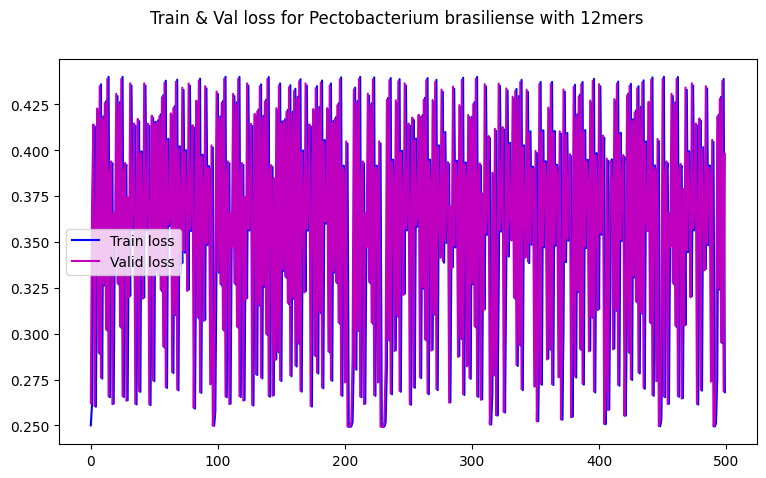

In [17]:
#Purely to define split, no writing
k_fold_data = k_fold_split(train_val_path, k=5, seed=42)
for fold_idx, (train_data, val_data) in enumerate(k_fold_data):
    print(f"Fold {fold_idx+1}: Train data length: {len(train_data)}, Val data length: {len(val_data)}")
    display(train_data.groupby("label").agg(count=('kmer_hash','count')))

    #Encoding data
    x_train_, y_train_ = encode_new_data(train_data)
    x_valid_, y_valid_ = encode_new_data(val_data)
    print(x_train_.shape)
    print(x_train_)

    #Initializing model
    input_size = x_train_.shape[1] # also known as "n_features"
    # Model and training hyperparameters
    learning_rate = 0.0001
    hidden_units = 50
    n_epochs = 500
    output_size = 1
    # Creating a model instance 
    # You can use either `xavier_initialization_normal` or `random_initialization_normal`
    # for the initialization_function argument of the class
    network = SimpleFFNN(input_size, hidden_units, output_size)#, 
                        #initialization_function=xavier_initialization_normal)

    # Training loops
    train_losses = []
    valid_losses = []

    # Run n_epochs of training
    for epoch in range(n_epochs):
        train_loss = train_network(network, x_train_, y_train_, learning_rate)
        valid_loss = eval_network(network, x_valid_, y_valid_)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        # For the first, every 5% of the epochs and last epoch, we print the loss 
        # to check that the model is properly training. (loss going down)
        if (n_epochs >= 10 and epoch % math.ceil(0.05 * n_epochs) == 0) or epoch == 0 or epoch == n_epochs:
            print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}\tValid Loss: {valid_loss:.4f}")

    # save model + plot losses (put your own savename to be used for the model and predictions)
    model_savepath = NN_files_path+'some_ffnn_model.pkl' # /path/to/your/stuff/filename.pkl
    save_ffnn_model(model_savepath, model=network)

    # plotting the losses 
    plot_losses(train_losses, valid_losses, n_epochs, title=f"Train & Val loss for {selected_bact_species} with {K}mers")

    break

### Testing model

# Model using Keras

In [18]:
import os
import pandas as pd

K = 18
data_prod_path = "../data_prod/"
all_phage_minhash_txt_path = data_prod_path + f"phage_minhash_{K}_combined/"

# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the directory
for filename in os.listdir(all_phage_minhash_txt_path):
    if filename.endswith('_combined.txt'):
        filepath = os.path.join(all_phage_minhash_txt_path, filename)
        
        # Read the file into a dataframe
        df = pd.read_csv(filepath, sep='\t', header=None, names=['kmer_hash', 'label'])
        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.to_csv(all_phage_minhash_txt_path+"../phage_18_all.txt", sep="\t")

print(f"Combined dataframe shape: {combined_df.shape}")
print(combined_df.head())

KeyboardInterrupt: 

In [ ]:
### Combining files that starts with Pectobacterium
import os
import pandas as pd

K = 18
data_prod_path = "../data_prod/"
all_phage_minhash_txt_path = data_prod_path + f"phage_minhash_{K}_combined/"

# Initialize an empty list to store dataframes
dfs = []

# Loop through each file in the directory
for filename in os.listdir(all_phage_minhash_txt_path):
    if filename.startswith('Pecto'):
        filepath = os.path.join(all_phage_minhash_txt_path, filename)
        
        # Read the file into a dataframe
        df = pd.read_csv(filepath, sep='\t', header=None, names=['kmer_hash', 'label'])
        
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes into a single dataframe
pecto_df = pd.concat(dfs, ignore_index=True)
pecto_df.to_csv(all_phage_minhash_txt_path+"../phage_18_pecto.txt", sep="\t")

print(f"pecto_df dataframe shape: {pecto_df.shape}")
print(pecto_df.head())

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

K = 18
selected_bact_species = "Pectobacterium brasiliense"
data_prod_path = "../data_prod/"
full_path = data_prod_path+f"phage_minhash_{K}_combined/{selected_bact_species.replace(' ', '_')}_combined.txt"
# --- 1. Raw Data Input ---
# The provided data of minhashed k-mers and their binary labels (0/1).
data_str = """
14104189032391025891	0
9272555873177485702	1
14099220935155194787	0
14904868568718467447	0
4598318341245526010	0
12928218682532402448	0
17766489500413828799	0
12262843827502767463	1
15191645544529172491	0
10259680472464355762	1
18329537351721549328	0
1168172853346433374	1
2081507574639483341	1
15806857621905048525	1
13505998584889076293	1
683483166365466956	0
"""

# Read the data into a DataFrame
#df = pd.read_csv(full_path, sep='\t', header=None, names=['kmer_hash', 'label'])
#df = combined_df
df = pecto_df

# Separate the single numerical feature (X) and the binary labels (y)
X = df[['kmer_hash']].values
y = df['label'].values

print(f"Total samples: {len(X)}")
print("-" * 50)


# --- 2. Data Splitting (60/20/20 for Train/Validation/Test) ---

# Step 1: Split into Training (50%) and Temporary (50%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.5,  
    random_state=42, 
    shuffle=True, 
    stratify=y       # Important for small datasets to keep class balance
)

# Step 2: Split Temporary (50%) into Validation (25%) and Testing (25%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print(f"Split completed: Train={len(X_train)}, Validation={len(X_val)}, Test={len(X_test)}")
print("-" * 50)

# --- 3. Preprocessing: Feature Scaling (MANDATORY for large integers) ---
# We use StandardScaler to normalize the huge hash values to have zero mean and unit variance.

scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
# Transform the validation and test sets using the training data's parameters
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling complete. Data is ready for the network.")
# Example of scaled values (will be close to zero)
print(f"Example scaled k-mer value: {X_train_scaled[0][0]:.4f}")
print("-" * 50)


# --- 4. Define the Neural Network Model ---
# A simple feedforward network for binary classification.

def build_classifier_model():
    model = Sequential([
        # Input layer expects a single feature (the scaled hash value)
        Dense(32, activation='relu', input_shape=(1,), name='Input_Layer'), 
        # Hidden layer 1
        Dense(16, activation='relu', name='Hidden_Layer_1'),
        # Output layer for binary classification: 1 unit with sigmoid activation
        Dense(1, activation='sigmoid', name='Output_Layer') 
    ])
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy', # Standard loss for binary output
        metrics=['accuracy']
    )
    return model

model = build_classifier_model()
model.summary()
print("-" * 50)

# --- 5. Train and Evaluate ---

print("Starting model training (100 Epochs)...")

model.fit(
    X_train_scaled, 
    y_train, 
    epochs=2,           
    batch_size=4,         
    validation_data=(X_val_scaled, y_val),
    verbose=1             # Keep the output clean
)

# Evaluate on the final, unseen test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Training Complete.")
print(f"Test Accuracy on unseen data: {accuracy:.4f}")
print("-" * 50)


In [ ]:
# --- 6. ROC Curve Analysis and Plotting (NEW SECTION) ---
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 

# Predict probabilities on the test set
# .ravel() converts the (n, 1) prediction array to a (n,) vector
y_pred_proba = model.predict(X_test_scaled).ravel()

# Calculate ROC curve metrics (False Positive Rate, True Positive Rate, and Thresholds)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC AUC Score: {roc_auc:.4f}")
print("-" * 50)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.savefig("ROC_curve.png")

In [ ]:
thresholds